# Imports

In [1]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"
from scipy.optimize import curve_fit
from plotly.subplots import make_subplots

# 1)

In [3]:
AuNP_data = pd.read_csv('/content/drive/MyDrive/ENMA/441/AuNP.txt',sep='\t')
Water_data = pd.read_csv('/content/drive/MyDrive/ENMA/441/Water.txt',sep='\t')

In [4]:
AuNP_data = AuNP_data.assign(Sample='AuNP')
Water_data = Water_data.assign(Sample='Water')

In [5]:
fig = go.Figure()
fig.add_trace(go.Line(x=AuNP_data['q'], y=AuNP_data['I'],
                    mode='lines', name = 'AuNP'))
fig.add_trace(go.Line(x=Water_data['q'], y=Water_data['I'],
                    mode='lines', name = 'Water'))
fig.update_layout(title='Intensity vs |q|',
                   xaxis_title='|q| (1/A)',
                   yaxis_title='Intensity (a.u.)')
fig.update_yaxes(type="log")
fig.update_layout(width = 1000)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# 2)

In [6]:
AuNP_data['Net Intensity'] = AuNP_data['I']-Water_data['I']
AuNP_data['Net Intensity (a.u.)'] = AuNP_data['I']-Water_data['I']

In [7]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Linear Linear", "Log Linear"))
#fig.add_trace(go.Line(x=AuNP_data['q'], y=AuNP_data['fit'],
#                    mode='lines',
#                    name='Fitted Data'), row = 1, col = 1)

fig.add_trace(go.Line(x=AuNP_data['q'], y=AuNP_data['Net Intensity'],
                    mode='lines'), row = 1, col = 1)
fig.add_trace(go.Line(x=AuNP_data['q'], y=AuNP_data['Net Intensity'],
                    mode='lines'), row = 1, col = 2)
fig.update_yaxes(type="log", row=1, col=2)
fig.update_layout(title='Net Intensity of AuNP Data vs |q|',
                   xaxis_title='|q| (1/A)',
                   yaxis_title='Net Intensity (a.u.)')
#fig.update_layout(width = 1000)

# 3)

In [8]:
AuNP_data['ln(I(q))'] = AuNP_data['I'].apply(np.log)
AuNP_data['Cleaned Net Intensity'] = AuNP_data['Net Intensity'].apply(lambda x: .000001 if x<=0 else x)
AuNP_data['cleaned ln(I(q))'] = AuNP_data['Cleaned Net Intensity'].apply(np.log)
AuNP_data['q^2'] = AuNP_data['q'].apply(lambda x: x**2)

In [9]:
fig = go.Figure()
fig.add_trace(go.Line(x=AuNP_data['q^2'], y=AuNP_data['cleaned ln(I(q))'],
                    mode='lines'))
fig.update_layout(title='Log Net Intensity vs |q|^2',
                   xaxis_title='|q|^2 (1/A^2)',
                   yaxis_title='Log Net Intensity')
fig.update_layout(yaxis_range=[-8,3],width=1000)
#AuNP_data.plot.line(x="q^2", y="cleaned ln(I(q))",title="Net Intensity of AuNP Data")

## Slope of the linear portion = -1833.17
q^2_0 = 22.2*10^-6, ln(I(q))_0 = 2.335

q^2_1 = .00129, ln(I(q))_1 = 0.0109



## log of Gunier Eq. <br>
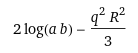

## Therefore, slope of the plot = -R_g^2/3. <br>
## R_g ~= 74.1552

# 4)

In [10]:
# define the function
def intensity_function(data,x,R):
    u = data*R
    return x**2*(3/u**3*(np.sin(u)-u*np.cos(u)))**2



In [11]:
parameters, covariance = curve_fit(intensity_function, AuNP_data['q'], AuNP_data['Net Intensity']) #from scipy.optimize

In [12]:
covariance

array([[1.54688854e-05, 5.27954230e-04],
       [5.27954230e-04, 4.35106933e-02]])

In [13]:
parameters

array([ 3.08806489, 88.1243807 ])

## **Fitted R_g = 88.124**

In [14]:
fit = intensity_function(AuNP_data['q'], parameters[0],parameters[1])
AuNP_data['fit'] = fit

fig = make_subplots(rows=1, cols=2, subplot_titles=("Fit alone", "Fit vs data"))
fig.add_trace(go.Line(x=AuNP_data['q'], y=AuNP_data['fit'],
                    mode='lines',
                    name='Fitted Data'), row = 1, col = 1)
#fig.add_trace(go.Scatter(x=AuNP_data['q'], y=AuNP_data['I'],
#                    mode='lines+markers',
#                    name='lines+markers'))
fig.add_trace(go.Scatter(x=AuNP_data['q'], y=AuNP_data['Cleaned Net Intensity'],
                    mode='lines',
                    name='True Net Data'), row = 1, col = 2)
fig.add_trace(go.Line(x=AuNP_data['q'], y=AuNP_data['fit'],
                    mode='lines',
                    name='Fitted Data'), row = 1, col = 2)
fig.update_layout(title='Net Intensity vs q',
                   xaxis_title='|q| (1/A)',
                   yaxis_title='Net Intensity (a.u.)')
#fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                    mode='markers', name='markers'))
#
#px.line(AuNP_data, x='q',y='fit')


#5)

## **Value of R_g obtained in 3 and 4: 74.1552 and 88.124**
## These values could be different for a variety of reasons. For one, the fit may just be a non-linear approximation of the function, and may not accurately the true functional form of the function. Additionally, selecting a slope within the linear region of the ln(I(q)) vs q^2 plot is relatively arbitrary - selecting a slope that is slightly steeper results in a R_g of 80+. Additionally, the noise in the data collection could have affected both the fit and the slope, affecting both values.

#6)

## Q: Why does intensity decrease with increasing |q|?
## The q vector represents the distance between the k vector and the k-prime vector. The bigger the q vector is, the more the X-ray is scattered. Because the scattered wave is a sphere wave, intensity is conserved only as a function of solid angle. As |q| increases, the intensity is spread out over a larger area since intensity is only conserved over solid angle. Because larger q vectors mean larger scattering, it also means larger distance to the detector. Since intensity is conserved over solid angle, the areas in the center of the detector are the closest and therefore receieve a higher intensity, and the intensity detected at larger q vectors is lower.